In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [133]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offset1, offset2, = np.random.rand(4, batch_size, 1)
    time = np.linspace(0,1,n_steps)
    print(time.shape)
    series = 0.5 * np.sin((time-offset1)* (freq1*10+10))
    print(series.shape)
    series += 0.5 * np.sin((time-offset2)* (freq2*10+10))
    print(series.shape)
    series += 0.1 * (np.random.rand(batch_size,n_steps)-0.5)
    print(series.shape)
    return series[..., np.newaxis].astype(np.float32)


In [134]:
n_steps = 50
series = generate_time_series(10000,n_steps+1)
series.shape

(51,)
(10000, 51)
(10000, 51)
(10000, 51)


(10000, 51, 1)

In [10]:
X_train,y_train =  series[:7000, :n_steps], series[:7000,-1]
X_valid,y_valid =  series[7000:9000, :n_steps], series[7000:9000,-1]
X_test,y_test =  series[9000:, :n_steps], series[9000:,-1]

In [11]:
y_pred = X_valid[:,-1]
np.mean(keras.losses.mean_squared_error(y_valid,y_pred))

0.024436448

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [50,1]),
    keras.layers.Dense(1)
])
model.compile(loss = 'mean_squared_error', optimizer='adam')
model.fit(X_train,y_train, epochs = 20)
y_preds = model.predict(X_valid)
np.mean(keras.losses.mean_squared_error(y_preds, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 1ms/step - loss: 0.0844
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 11/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 12/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 13/20
219/219 [====

0.0024459106

In [18]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape = [None,1])
])
model.compile(loss = 'mean_squared_error')
model.fit(X_train,y_train, epochs=20)
preds = model.predict(X_valid)
np.mean(keras.losses.mean_squared_error(preds,y_valid))

Epoch 1/20
219/219 [==============================] - 4s 15ms/step - loss: 1.0540
Epoch 2/20
219/219 [==============================] - 4s 18ms/step - loss: 0.8252
Epoch 3/20
219/219 [==============================] - 4s 16ms/step - loss: 0.6302
Epoch 4/20
219/219 [==============================] - 3s 15ms/step - loss: 0.5435
Epoch 5/20
219/219 [==============================] - 3s 15ms/step - loss: 0.4510
Epoch 6/20
219/219 [==============================] - 3s 16ms/step - loss: 0.3055
Epoch 7/20
219/219 [==============================] - 4s 17ms/step - loss: 0.2445
Epoch 8/20
219/219 [==============================] - 2s 11ms/step - loss: 0.2441
Epoch 9/20
219/219 [==============================] - 3s 14ms/step - loss: 0.2432
Epoch 10/20
219/219 [==============================] - 3s 15ms/step - loss: 0.2442
Epoch 11/20
219/219 [==============================] - 5s 21ms/step - loss: 0.2437
Epoch 12/20
219/219 [==============================] - 3s 13ms/step - loss: 0.2439
Epoch 13/20
2

0.24001133

In [19]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20,return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(1)
])
model.compile(loss='mean_squared_error')
model.fit(X_train, y_train, epochs =20)
preds = model.predict(X_valid)
np.mean(keras.losses.mean_squared_error(preds,y_valid))

Epoch 1/20
219/219 [==============================] - 7s 17ms/step - loss: 0.0409
Epoch 2/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0103
Epoch 3/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0070
Epoch 4/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0056
Epoch 5/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0048
Epoch 6/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0043
Epoch 7/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0040
Epoch 8/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0038
Epoch 9/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0036
Epoch 10/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0035
Epoch 11/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0033
Epoch 12/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0032
Epoch 13/20
2

0.0028618146

In [93]:
series = generate_time_series(1, n_steps + 50)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
preds = model.predict(X_new)
Y_new.shape

(1, 50, 1)

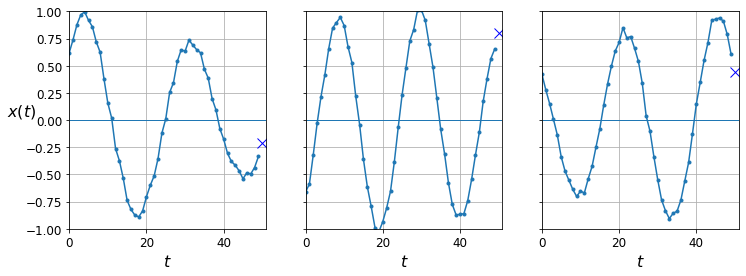

In [35]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()

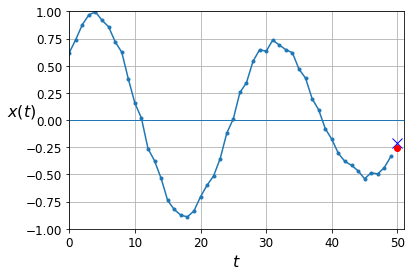

In [36]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

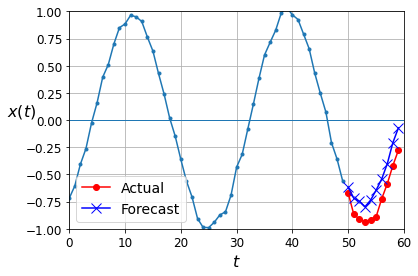

In [121]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
preds = model.predict(X_new)
plot_multiple_forecasts(X_new, Y_new, preds[:,-1,:])
plt.show()

In [114]:
X_valid.shape

(2000, 50, 1)

In [38]:
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train=series[:7000, :n_steps], series[:7000, -10:,0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:,0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:,0]

In [43]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])
model.compile(loss='mean_squared_error')
model.fit(X_train,y_train, epochs=20)
Y_pred = model.predict(X_new)

Epoch 1/20
219/219 [==============================] - 5s 13ms/step - loss: 0.2567
Epoch 2/20
219/219 [==============================] - 3s 13ms/step - loss: 0.2517
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 0.2517
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.2514
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.2514
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.2513
Epoch 7/20
219/219 [==============================] - 2s 11ms/step - loss: 0.2514
Epoch 8/20
219/219 [==============================] - 3s 12ms/step - loss: 0.2512
Epoch 9/20
219/219 [==============================] - 2s 11ms/step - loss: 0.2513
Epoch 10/20
219/219 [==============================] - 2s 10ms/step - loss: 0.2512
Epoch 11/20
219/219 [==============================] - 2s 10ms/step - loss: 0.2512
Epoch 12/20
219/219 [==============================] - 2s 10ms/step - loss: 0.2512
Epoch 13/20
2

In [47]:
Y_pred = model.predict(X_new)

In [55]:
def last_time_step_mse(Y_true,Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:,-1], Y_pred[:,-1])


In [52]:
class LNSimpleRNNCell(keras.layers.Layer):

    def __init__(self,units,activation='tanh',**kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units 
        self.simple = keras.layers.SimpleRNNCell(units,activation=None)
        self.activation = keras.activations.get(activation)
        self.layerNorm = keras.layers.LayerNormalization()
    
    def call(self,inputs, hidden):
        outputs, new_states = self.simple(inputs, hidden)
        norm_outputs = self.activation(self.layerNorm(outputs))
        return norm_outputs, [norm_outputs]



In [62]:
y = np.empty((10000,n_steps,10))
for step_ahead in range(1,11):
    y[:,:,step_ahead-1] = series[:,step_ahead:step_ahead+n_steps,0]

y_train = y[:7000]
y_valid = y[7000:9000]
y_test = y[9000:]

In [63]:
y_train.shape

(7000, 50, 10)

In [66]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20,return_sequences=True, input_shape=[None,1]),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.compile(loss='mean_squared_error', metrics = [last_time_step_mse])
model.fit(X_train,y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 4s 10ms/step - loss: 0.0618 - last_time_step_mse: 0.0418
Epoch 2/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0388 - last_time_step_mse: 0.0185
Epoch 3/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0369 - last_time_step_mse: 0.0167
Epoch 4/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0357 - last_time_step_mse: 0.0156
Epoch 5/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0346 - last_time_step_mse: 0.0150
Epoch 6/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0334 - last_time_step_mse: 0.0141
Epoch 7/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0324 - last_time_step_mse: 0.0139
Epoch 8/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0311 - last_time_step_mse: 0.0134
Epoch 9/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0297 - last_time_step_mse: 0.0132
E

In [124]:
model = keras.models.Sequential([
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True,input_shape=[None, 1]),
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True,input_shape=[None, 1]),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.compile(loss='mean_squared_error', metrics = [last_time_step_mse])
model.fit(X_train,y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 7s 21ms/step - loss: 0.0950 - last_time_step_mse: 0.0690
Epoch 2/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0482 - last_time_step_mse: 0.0179
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0405 - last_time_step_mse: 0.0137
Epoch 4/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0368 - last_time_step_mse: 0.0122
Epoch 5/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0341 - last_time_step_mse: 0.0111
Epoch 6/20
219/219 [==============================] - 6s 25ms/step - loss: 0.0321 - last_time_step_mse: 0.0104
Epoch 7/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0301 - last_time_step_mse: 0.0101
Epoch 8/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0283 - last_time_step_mse: 0.0096
Epoch 9/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0268 - last_time_step_mse: 0.0093
E

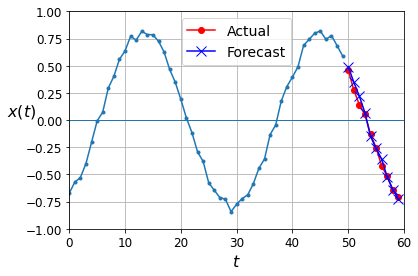

In [129]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
preds = model.predict(X_new)
plot_multiple_forecasts(X_new, Y_new, preds[:,-1,:])
plt.show()